In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings 

warnings.filterwarnings('ignore') 

C:\Users\W4TALENT\AppData\Local\Temp\ipykernel_12040\4203849879.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#loading the loan data and converting to dataframe
loan_df=pd.read_csv("G:/iiitB_ai-ml-pg/lendingclub-casestudy-mamta/loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 1. Data Cleaning

# 1.1 Checking if there are header/footer rows or summary details - if yes drop them

In [3]:
print(loan_df.shape)         #returns tuple with the dimension of the dataframe
loan_df.head()              

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### from above observation we can say there are no header rows or footers, total or subtotal rows. The dataframe has **rows=3917 and columns=111**

In [5]:
#checking the column names
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
loan_df["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [8]:
current_count = len(loan_df[loan_df["loan_status"]=="Current"])
current_count

1140

In [9]:
per_current=100*current_count/39717
per_current

2.8703074250321023

The aim of the analysis is to see who is likely to default and this can be analysed in case of either fully paid or charged off loans. dropping rows of "loan_status" with value "Current" which is equal to **1140 rows equal to 2.8%** as the loan repayment is still in process and cannot help us take any decision about the borrower

In [10]:
loan_df=loan_df[loan_df['loan_status']!='Current']

##### number of rows now is 38577=39717-1140

In [11]:
#check for duplicate rows
dup_rows=len(loan_df[loan_df.duplicated()])
print("Duplicated rows: ", dup_rows)

Duplicated rows:  0


## 1.2 Deleting columns that have null/NA values

In [12]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

### There are many columns such as tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit and so on with all values as null. let us drop those columns

In [13]:
loan_df.dropna(axis=1, how="all", inplace=True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


##### the number of columns now is 56. checking if those columns exist

In [14]:
if set(["tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit"]).issubset(loan_df.columns):
   print("Yes")
else:
   print("No")

No


#### There are some columns which are single valued. Those columns are not useful in our analysis. So droping them.
The columns are:['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt']

In [15]:
loan_df["pymnt_plan"]

0        n
1        n
2        n
3        n
5        n
        ..
39712    n
39713    n
39714    n
39715    n
39716    n
Name: pymnt_plan, Length: 38577, dtype: object

In [16]:
for col in loan_df:
    if len(loan_df[col].unique())==1:
        loan_df.drop(col, axis=1, inplace=True)

In [17]:
loan_df.shape

(38577, 48)

#### now we are left with 48 columns. out of these there are soe columns which are not helpful in the analysis. such as:
- columns like "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". We will keep id alone for future use if needed.
- desc" has description (text data) which is not helpful
- "total_pymnt_inv" is not useful for defaulters analysis
- "funded_amnt" is not needed as we need information about how much has ben funded. As we have "funded_amnt_inv" , we can drop "funded_amnt"

In [18]:
loan_df.drop(["member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)


In [19]:
loan_df.shape

(38577, 25)

In [20]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Replacing null values with most frequent values

In [21]:
#for col in loan_df.columns:
 #   missing_data = round(loan_df[col].isna().sum() / loan_df.shape[0], 2)
  #  if missing_data >= 0.65:
   #     loan_df.drop(col, axis = 1, inplace = True)
        
#loan_df.shape
(loan_df.isna().sum()/len(loan_df.index))*100

id                            0.000000
loan_amnt                     0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.677761
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
purpose                       0.000000
dti                           0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_util                    0.129611
total_acc                     0.000000
collections_12_mths_ex_med    0.145164
pub_rec_bankruptcies          1.806776
tax_liens                     0.101097
dtype: float64

### Handling Missing values
 - columns with missing values are "emp_length", "revol_util", "collections_12_mths_ex_med", "pub_rec_bankruptcies", "tax_liens". 
 - let us check what kind of data each column has. 

In [22]:
loan_df.emp_length.isna().sum()

1033

#### Annual income of applicants whose employment length is missing

In [23]:
loan_df[loan_df.emp_length.isna()]["annual_inc"].describe()

count      1033.000000
mean      45913.330649
std       37964.731520
min        4200.000000
25%       25000.000000
50%       38368.000000
75%       57600.000000
max      648000.000000
Name: annual_inc, dtype: float64

#### Most frequent, mean and median of Annual income of loan applicants whose employment length is missing

In [24]:
loan_df[loan_df.emp_length.isna()]["annual_inc"].mode()

0    36000.0
Name: annual_inc, dtype: float64

In [25]:
loan_df[loan_df.emp_length.isna()]["annual_inc"].mean()

45913.330648596326

In [26]:
loan_df[loan_df.emp_length.isna()]["annual_inc"].median()

38368.0

#### Most frequent employent length. its a string object we cannot calculate mean and median at the moment and also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis to a greater extent. 

In [27]:
loan_df["emp_length"].mode()

0    10+ years
Name: emp_length, dtype: object

In [28]:
loan_df[loan_df["emp_length"]=="10+ years"]["annual_inc"].median

<bound method Series.median of 0         24000.0
2         12252.0
3         49200.0
11        75000.0
17       110000.0
           ...   
39642    118000.0
39649    150000.0
39650     65000.0
39662    125000.0
39682    125000.0
Name: annual_inc, Length: 8488, dtype: float64>

In [29]:
loan_df[loan_df["emp_length"]=="10+ years"]["annual_inc"].mode()

0    60000.0
Name: annual_inc, dtype: float64

##### Employment length has 1033 missing values, which means either they are not employed or self-employed. Based on the frequent annual income for 10+ years which is 60000, we are assuming that they are self employed and we are updating their employment length with 10+ years

In [30]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.emp_length.isna().sum()

0

In [31]:
loan_df.revol_util.isna().sum()

50

#### only 50 values are missing in revol_util column.

In [32]:
loan_df.revol_util.mode()

0    0%
Name: revol_util, dtype: object

#### we can either drop rows with missing values for revol_util or can repace with mode value which is 0%

##### Replacing the missing values with 0% for now

In [33]:
loan_df.revol_util.fillna(loan_df.revol_util.mode()[0], inplace = True)
loan_df.revol_util.isna().sum()

0

## 1.3 Standardizing data

### 1.3.1 Converting Columns data types

In [34]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  object 
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_length                  38577 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  issue_d                     38577 non-null  object 
 13  loan_status                 38577 no

#### term, int_rate, emp_length, issue_d are all strings. term, emp_length should be int. loan_amnt should be float, issue_d should be datetime

### 1.3.2 Convert funded_amnt_inv, int_rate and loan_amnt to float datatype

In [35]:
loan_df = loan_df.astype({
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'    
})

In [36]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   loan_amnt                   38577 non-null  float64
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  object 
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_length                  38577 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  issue_d                     38577 non-null  object 
 13  loan_status                 38577 no

### Strip " months" from term  and % from int_rate and convert them to int and float respectively

In [37]:
loan_df["term"]=loan_df["term"].apply(lambda x: int(x.replace(" months", "")))

In [38]:
loan_df.term.dtypes

dtype('int64')

In [39]:
loan_df["int_rate"]=loan_df["int_rate"].apply(lambda x: float(x.replace("%", "")))
loan_df.int_rate.dtypes

dtype('float64')

In [40]:
loan_df['revol_util'] = pd.Series(loan_df['revol_util']).str.replace('%', '').astype(float)
loan_df['revol_util'].describe()

count    38577.000000
mean        48.639653
std         28.400460
min          0.000000
25%         25.100000
50%         49.000000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

In [41]:
#emp_length_int: dict = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,'8 years': 8, '9 years': 9, '10+ years': 10}
#loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_int)


In [42]:
#loan_df['emp_length'].astype(int)

### 1.3.3 Rounding of the values of columns to two decimal places

In [43]:
for col in ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'dti', 'revol_util']:
    loan_df[col] = loan_df[col].apply(lambda x: round(x, 2))

### 1.3.4 Converting issue_d to DateTime (format: yyyy-mm-dd)¶



In [44]:
loan_df["issue_d"]=pd.to_datetime(loan_df['issue_d'], format = '%b-%y')

In [45]:
#loan_df["issue_d"].sample(100)

In [46]:
loan_df.sample(20)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,pub_rec_bankruptcies,tax_liens
9949,840199,1800.0,1800.00,36,7.49,55.99,A,A4,10+ years,MORTGAGE,...,11.30,Jan-88,0,8,0,75.30,17,0.0,0.0,0.0
11740,809008,6000.0,6000.00,36,11.49,197.83,B,B4,3 years,RENT,...,14.27,Jun-03,2,6,0,62.90,8,0.0,0.0,0.0
16140,727624,24000.0,23465.66,60,12.68,542.16,C,C1,10+ years,MORTGAGE,...,1.39,May-99,0,17,0,6.20,35,0.0,0.0,0.0
8480,865204,12000.0,12000.00,36,5.42,361.92,A,A1,10+ years,MORTGAGE,...,5.74,Jun-98,0,9,0,27.80,13,0.0,0.0,0.0
4056,1008845,20000.0,19975.00,60,14.65,472.14,C,C3,3 years,RENT,...,22.21,Dec-90,1,12,0,31.20,36,0.0,0.0,0.0
30662,504547,20000.0,18725.00,36,13.48,678.49,C,C3,3 years,MORTGAGE,...,12.07,Sep-00,0,13,0,23.00,28,0.0,0.0,0.0
34329,439786,16000.0,15875.00,36,16.35,565.27,E,E1,1 year,RENT,...,0.36,Dec-04,3,7,0,3.90,12,0.0,0.0,0.0
34573,449880,5000.0,5000.00,36,8.59,158.06,A,A4,1 year,RENT,...,14.74,Jun-00,2,12,0,23.00,25,0.0,0.0,0.0
24066,605872,9250.0,9093.56,36,14.46,318.22,D,D2,9 years,RENT,...,22.41,Apr-01,0,10,0,90.00,20,0.0,0.0,0.0
2511,1035273,9500.0,9500.00,36,8.90,301.66,A,A5,2 years,RENT,...,14.34,Apr-88,0,9,0,78.70,11,0.0,0.0,0.0


## 1.4 Imputing data

In [47]:
loan_df.verification_status.value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

#### will club source verified and verified as verified for convinience

In [48]:
#loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)
#loan_df.verification_status.value_counts()

In [49]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

##### Imputing NONE values as OTHER for home_ownership

In [50]:
loan_df['home_ownership'].replace('NONE', 'OTHER', inplace = True)
loan_df.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

In [51]:
loan_df.pub_rec_bankruptcies.isna().sum()

697

In [52]:
loan_df[loan_df.pub_rec_bankruptcies.isna()]

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,pub_rec_bankruptcies,tax_liens
35006,69001,15000.0,14875.00,36,8.94,476.58,A,A5,< 1 year,MORTGAGE,...,7.07,Nov-91,1,6,0,52.7,19,0.0,NaN,0.0
35058,59006,3000.0,2988.24,36,14.26,102.92,C,C5,3 years,MORTGAGE,...,14.97,Jul-98,0,13,0,39.5,23,0.0,NaN,0.0
35362,65426,4000.0,3892.26,36,11.14,131.22,B,B1,< 1 year,MORTGAGE,...,11.08,Aug-95,0,14,0,68.6,33,0.0,NaN,0.0
38443,68926,2300.0,589.61,36,13.17,77.69,D,D2,10+ years,RENT,...,2.26,Dec-97,0,4,0,88.4,13,0.0,NaN,0.0
38717,69251,6000.0,500.00,36,8.00,188.02,A,A3,< 1 year,MORTGAGE,...,16.08,Dec-94,1,16,0,23.2,39,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,1075.00,36,8.07,78.42,A,A4,4 years,MORTGAGE,...,11.33,Nov-90,0,13,0,13.1,40,NaN,NaN,NaN
39713,90665,8500.0,875.00,36,10.28,275.38,C,C1,3 years,RENT,...,6.40,Dec-86,1,6,0,26.9,9,NaN,NaN,NaN
39714,90395,5000.0,1325.00,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,2.30,Oct-98,0,11,0,19.4,20,NaN,NaN,NaN
39715,90376,5000.0,650.00,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,3.72,Nov-88,0,17,0,0.7,26,NaN,NaN,NaN


##### There are 697 null values for pub_rec_bankruptcies. Dropping them as they cannot be imputed.

In [53]:
loan_df = loan_df[loan_df.pub_rec_bankruptcies.notna()]
# checking i there are anymore null values in the dataframe
loan_df.isna().sum()

id                            0
loan_amnt                     0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
total_acc                     0
collections_12_mths_ex_med    2
pub_rec_bankruptcies          0
tax_liens                     0
dtype: int64

## 1.4 Removing outliers

<Axes: ylabel='annual_inc'>

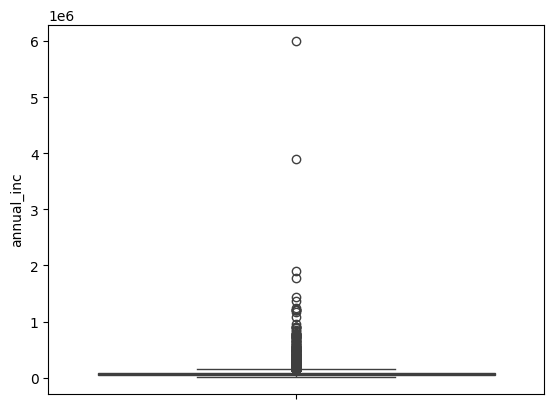

In [54]:
sns.boxplot(loan_df['annual_inc'])

In [55]:
qi = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.92, 0.95, 0.97,0.98, 0.99])
qi

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.92    122004.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

##### based on observation from box plot of annual income, there s a huge descripency post 92 quantile. so it shows the presence of outlier post 95th quantile. so dropping data after 95th quantile

In [56]:
an_in_95 = loan_df["annual_inc"].quantile(0.95)

In [57]:
loan_df=loan_df[loan_df.annual_inc<=an_in_95]

<Axes: ylabel='annual_inc'>

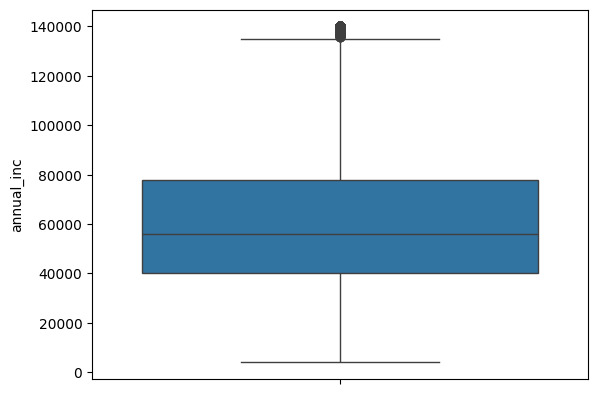

In [58]:
sns.boxplot(loan_df.annual_inc)

##### annual income data now looks better

##### will check other variables which can possibly have outliers:
- dti
- loan_amnt
- funded_amnt_inv
- int_rate
- installment 

<Axes: ylabel='dti'>

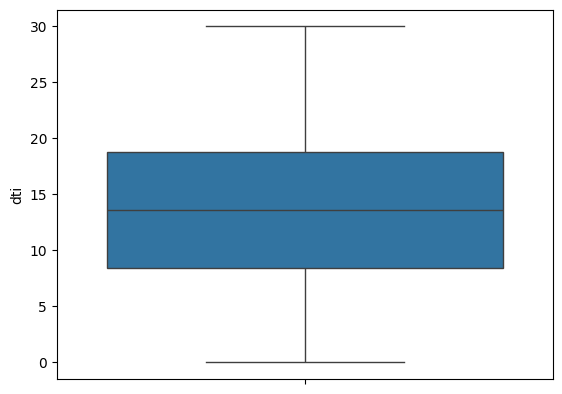

In [59]:
sns.boxplot(loan_df.dti)

<Axes: ylabel='loan_amnt'>

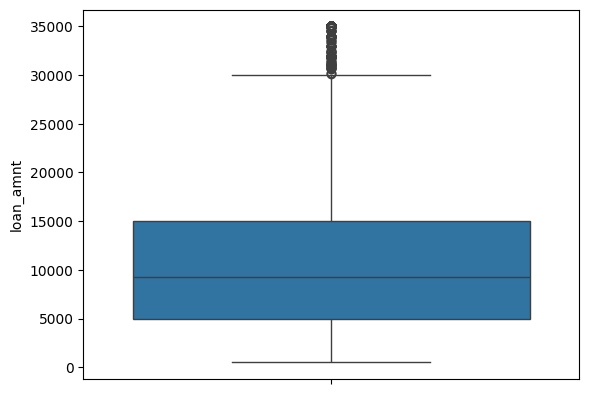

In [60]:
sns.boxplot(loan_df.loan_amnt)

<Axes: ylabel='funded_amnt_inv'>

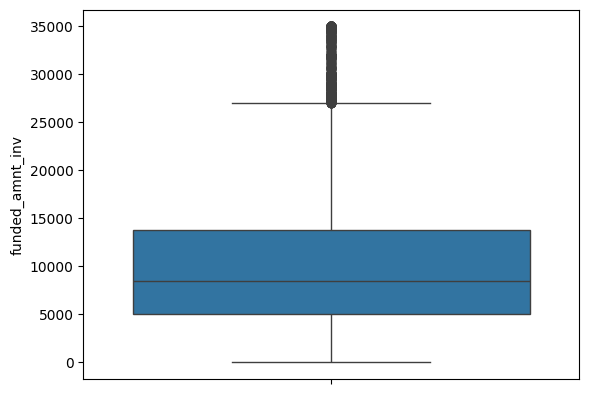

In [61]:
sns.boxplot(loan_df.funded_amnt_inv)

<Axes: ylabel='int_rate'>

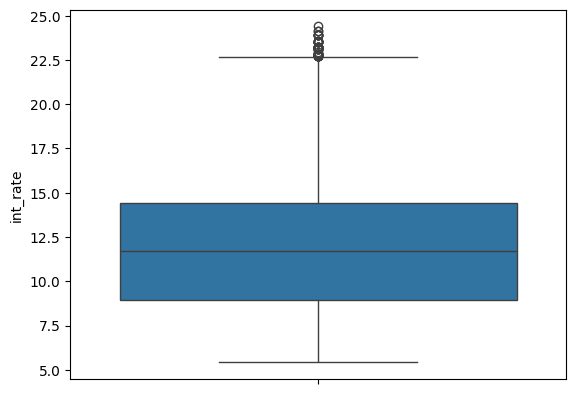

In [62]:
sns.boxplot(loan_df.int_rate)

In [63]:
quant_inf=loan_df.int_rate.quantile([0.75, 0.78, 0.8, 0.85, 0.87, 0.9, 0.92, 0.95, 0.98, 1])
quant_inf

0.75    14.42
0.78    14.83
0.80    15.21
0.85    15.96
0.87    16.29
0.90    16.77
0.92    17.27
0.95    18.25
0.98    19.91
1.00    24.40
Name: int_rate, dtype: float64

##### there is an anamoly post 98th quantile

<Axes: ylabel='installment'>

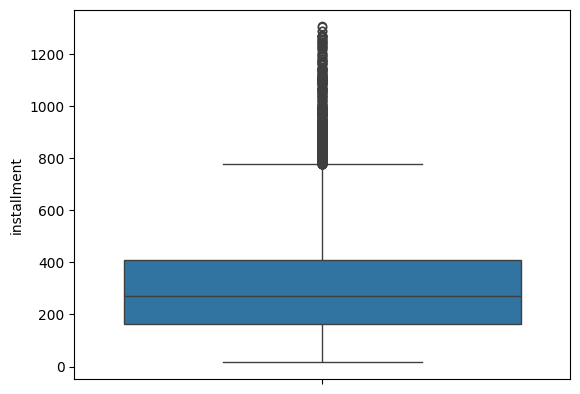

In [64]:
sns.boxplot(loan_df.installment)

#### Please refer to the presentation for conclusion based on above box plots

#### We have performe all types of data cleanup activity on the dataframe such as:
The loan dataframe is almost clean now and is ready to be analysed

## 1.4 EDA

#### Calculating %of deaulters

In [65]:
de=len(loan_df[loan_df["loan_status"].map(lambda x: x=="Charged Off")])
def_perc=de/len(loan_df.loan_status)*100
def_perc

14.740526725191689

In [66]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### 1.4.1 Seggregating data as Categorical (ordered, unordered) and quantitative variables
**Categorial variables**=['id', 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens']

**Quantitative variables**=[ 'loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti']

#### now let us look at the data one by one.
I would like to compare employment length and the loan amount

### 1.4.2 Univariate Analysis

### on ordered categorial variables

#### 1.4.2.1 Frequency of employment length in the overall loan applicants

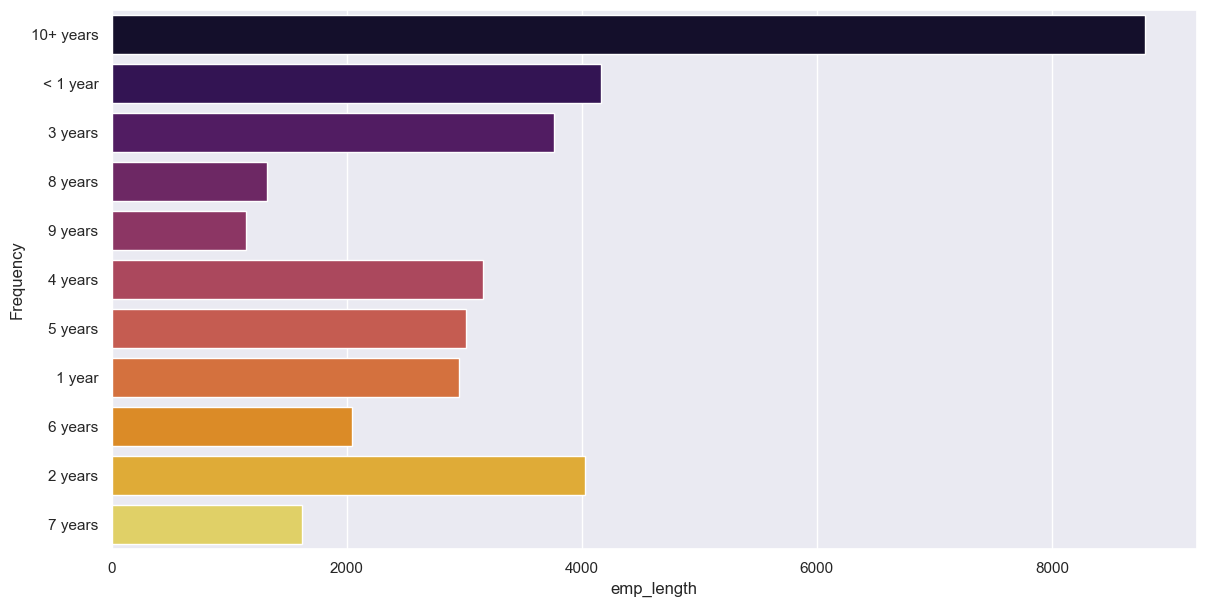

In [67]:
#for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens']:
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(loan_df["emp_length"], palette='inferno')
plt.xlabel("emp_length")
plt.ylabel("Frequency")
plt.show()

#### - it is clear from above plot that people with more than 10 years of experience are more likely to opt for loan

#### 1.2.4.2 checking the frequency of grade

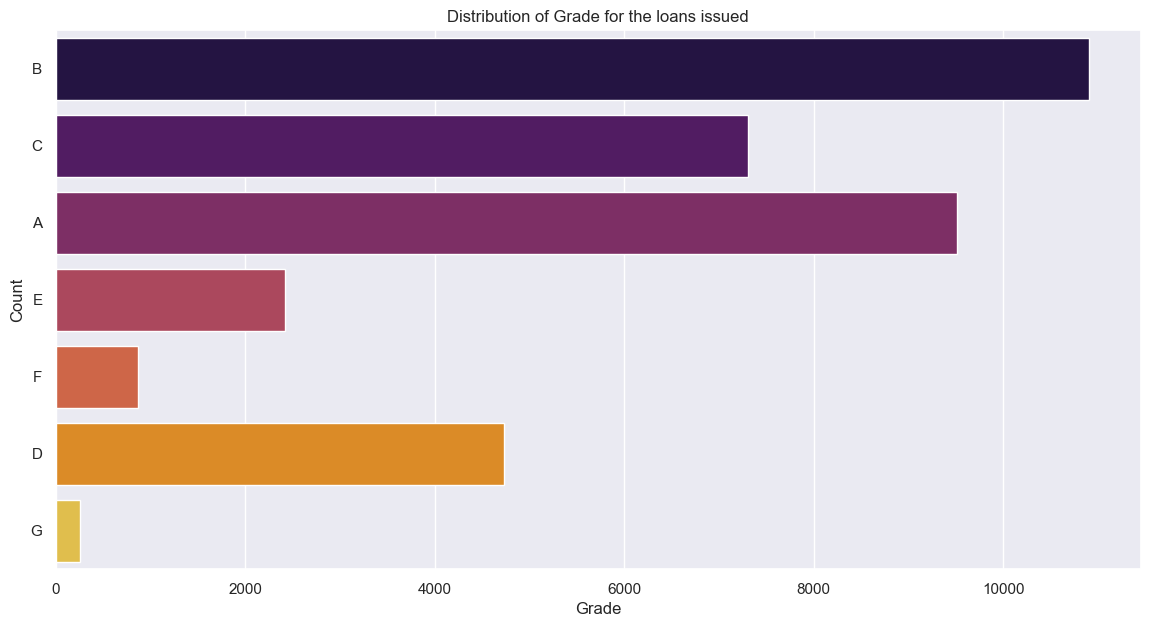

In [68]:
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(loan_df['grade'],palette='inferno')
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Distribution of Grade for the loans issued")
plt.show()

In [69]:
a=len(loan_df[loan_df["grade"]=="B"])
a

10903

##### Grade B is the clear winner whic has frequency more than 10000.

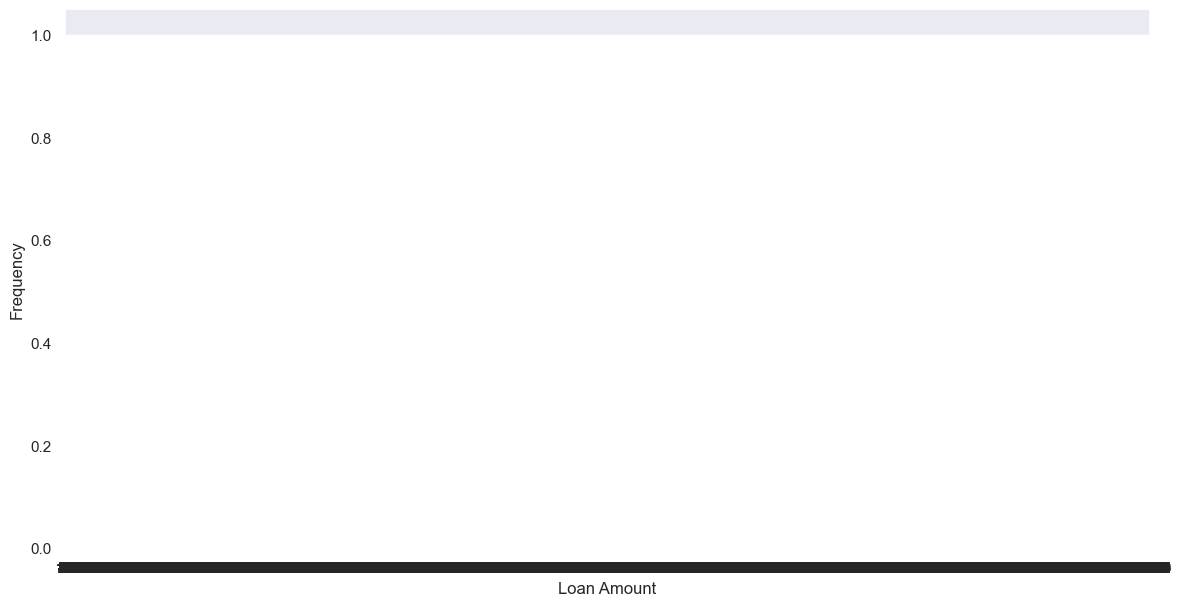

In [70]:
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(loan_df["loan_amnt"])
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

#### 1.2.4.4 Frequency of 'sub_grade'

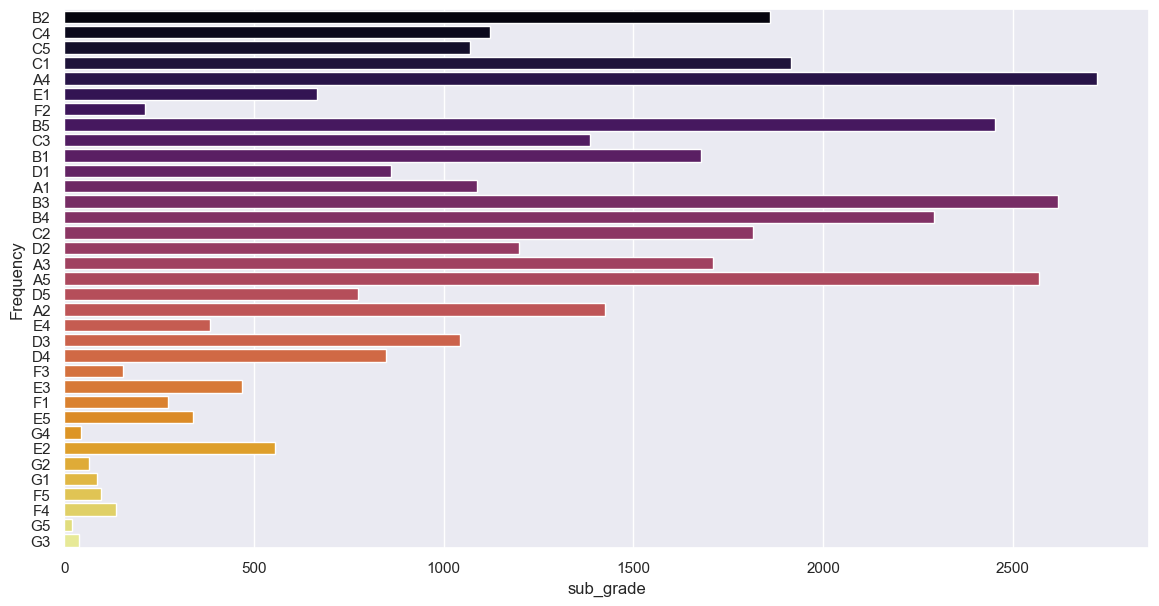

In [71]:
#for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens']:
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(loan_df["sub_grade"], palette='inferno')
plt.xlabel("sub_grade")
plt.ylabel("Frequency")
plt.show()
    

##### A4 has the highest frequency: 2723

In [72]:
loan_df["term"].value_counts()

term
36    27063
60     8933
Name: count, dtype: int64

#### 1.2.4.5 Home_ownership Frequency

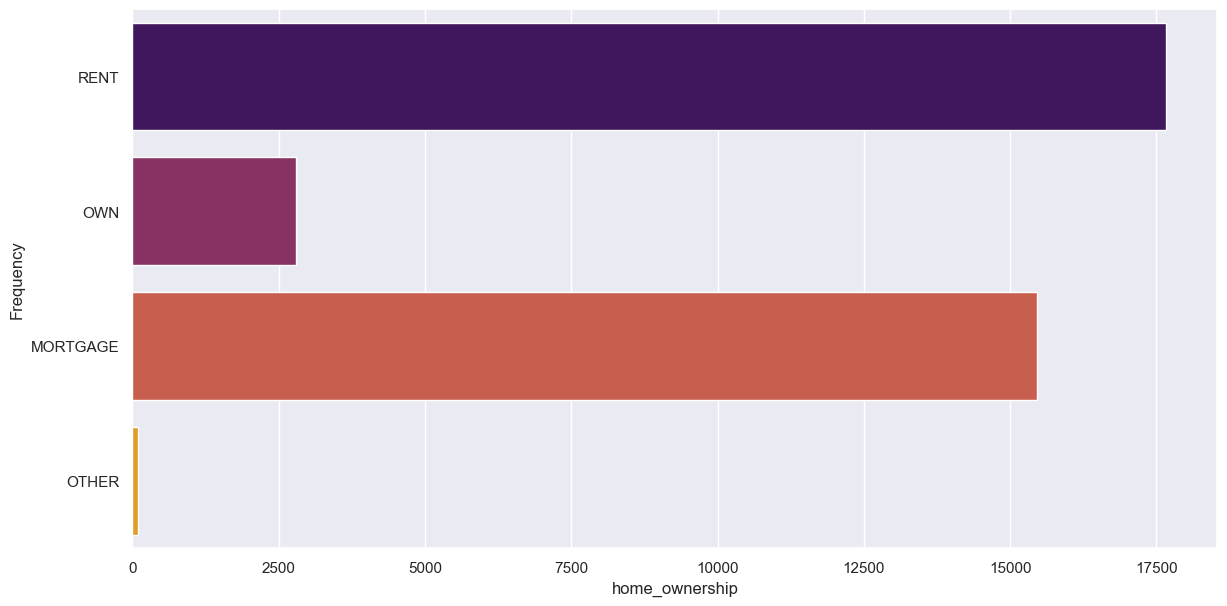

In [73]:
#for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens']:
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(loan_df["home_ownership"], palette='inferno')
plt.xlabel("home_ownership")
plt.ylabel("Frequency")
plt.show()

##### The majority of laon applicants are the ones who stay in a rented house: about 17500 applicants

#### 1.2.4.6 Purpose frequency

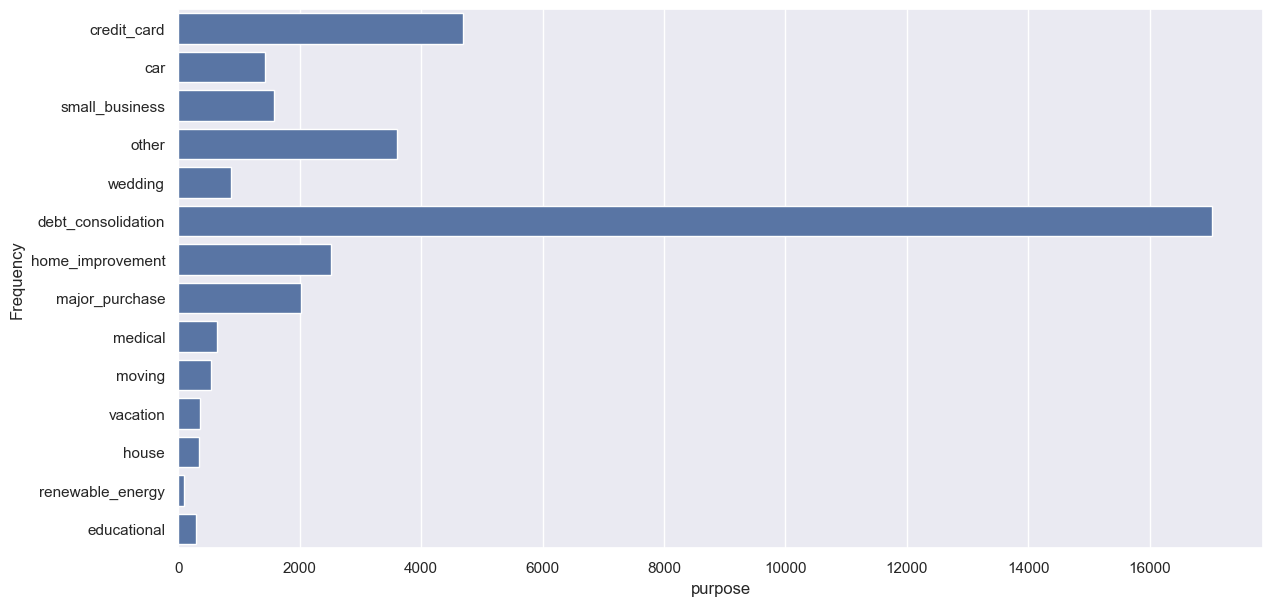

In [74]:
#for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens']:
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(loan_df["purpose"])
plt.xlabel("purpose")
plt.ylabel("Frequency")
plt.show()

#### 1.2.4.7 term frequency

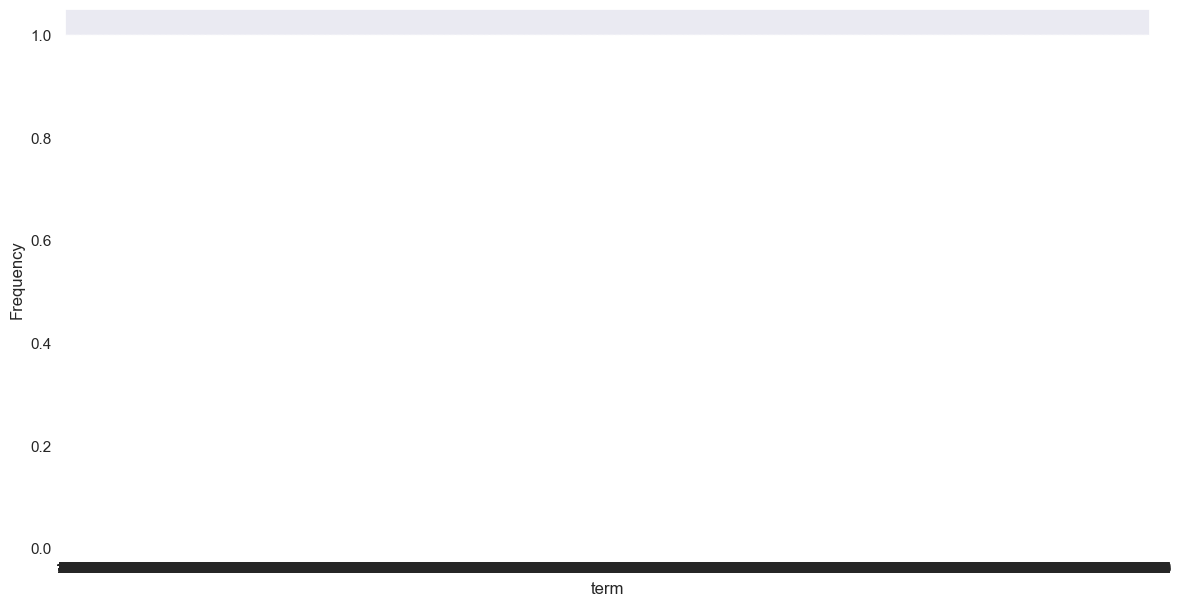

In [75]:
#for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens']:
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(loan_df["term"])
plt.xlabel("term")
plt.ylabel("Frequency")
plt.show()

#### 1.2.4.8 Verification status frequency

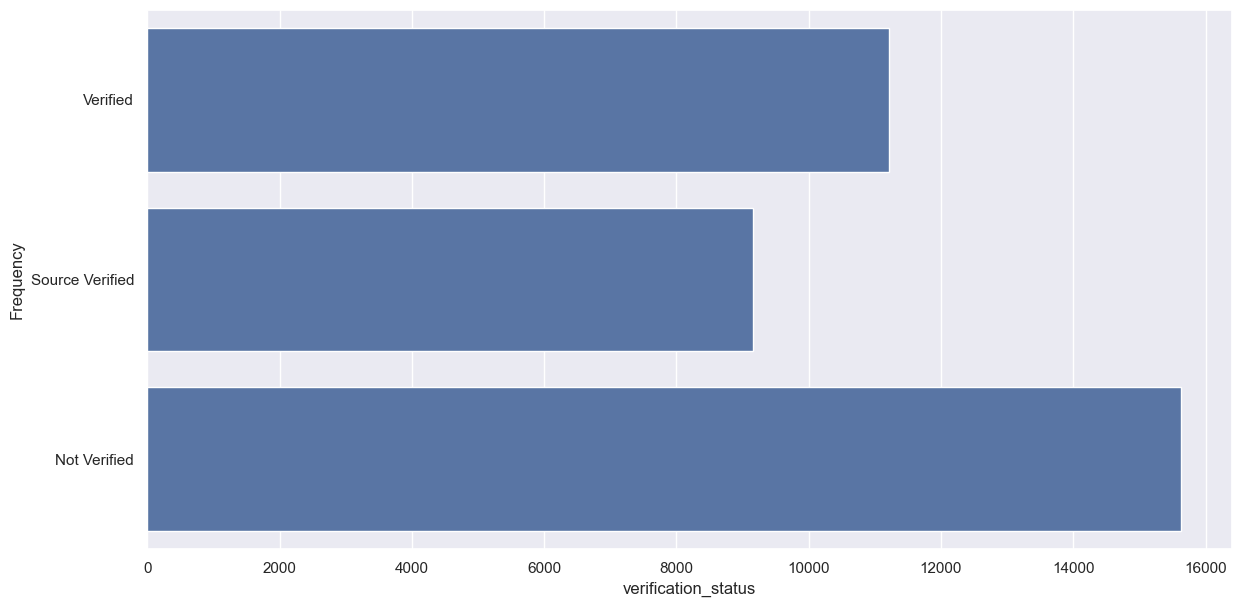

In [76]:
#for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens']:
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(loan_df["verification_status"])
plt.xlabel("verification_status")
plt.ylabel("Frequency")
plt.show()

#### Observations and Inferences from Univariate Analysis##### **
Ordered Categorical Variables**
Grade B had the highest numbeof loan applicantss.Longort-term loans with a duration of 36 months were the most popular among "Charged off" applicants, with 3,006 applications. This suggests that a significant portion of applicants who experienced loan default chose shorter repayment ter ms.

Applicants who had been employed for more than 10 years accounted for the highest number of "Charged off" loans, totali3311,474. This indicates that long-term employment history did not necessarily guarantee successful loan repay
out of 5306 defaulters around 1331 defaulters are from 10+ years exp. Which is significant.Which is about 25.1%ment.

The year 2011 recorded the highest number of "Charged off" loan applications, totalling 3,152, signaling a positive trend in the number of applicants facing loan defaults over the years. This could be indicative of economic or financial challenges during that year.

"Charged off" lominantmore ly takeDecemberh quarter, with 2,284 app December. This peak in loan applications during the holiday season might suggest that financial pressures during the holidays contributed to loan defaults.

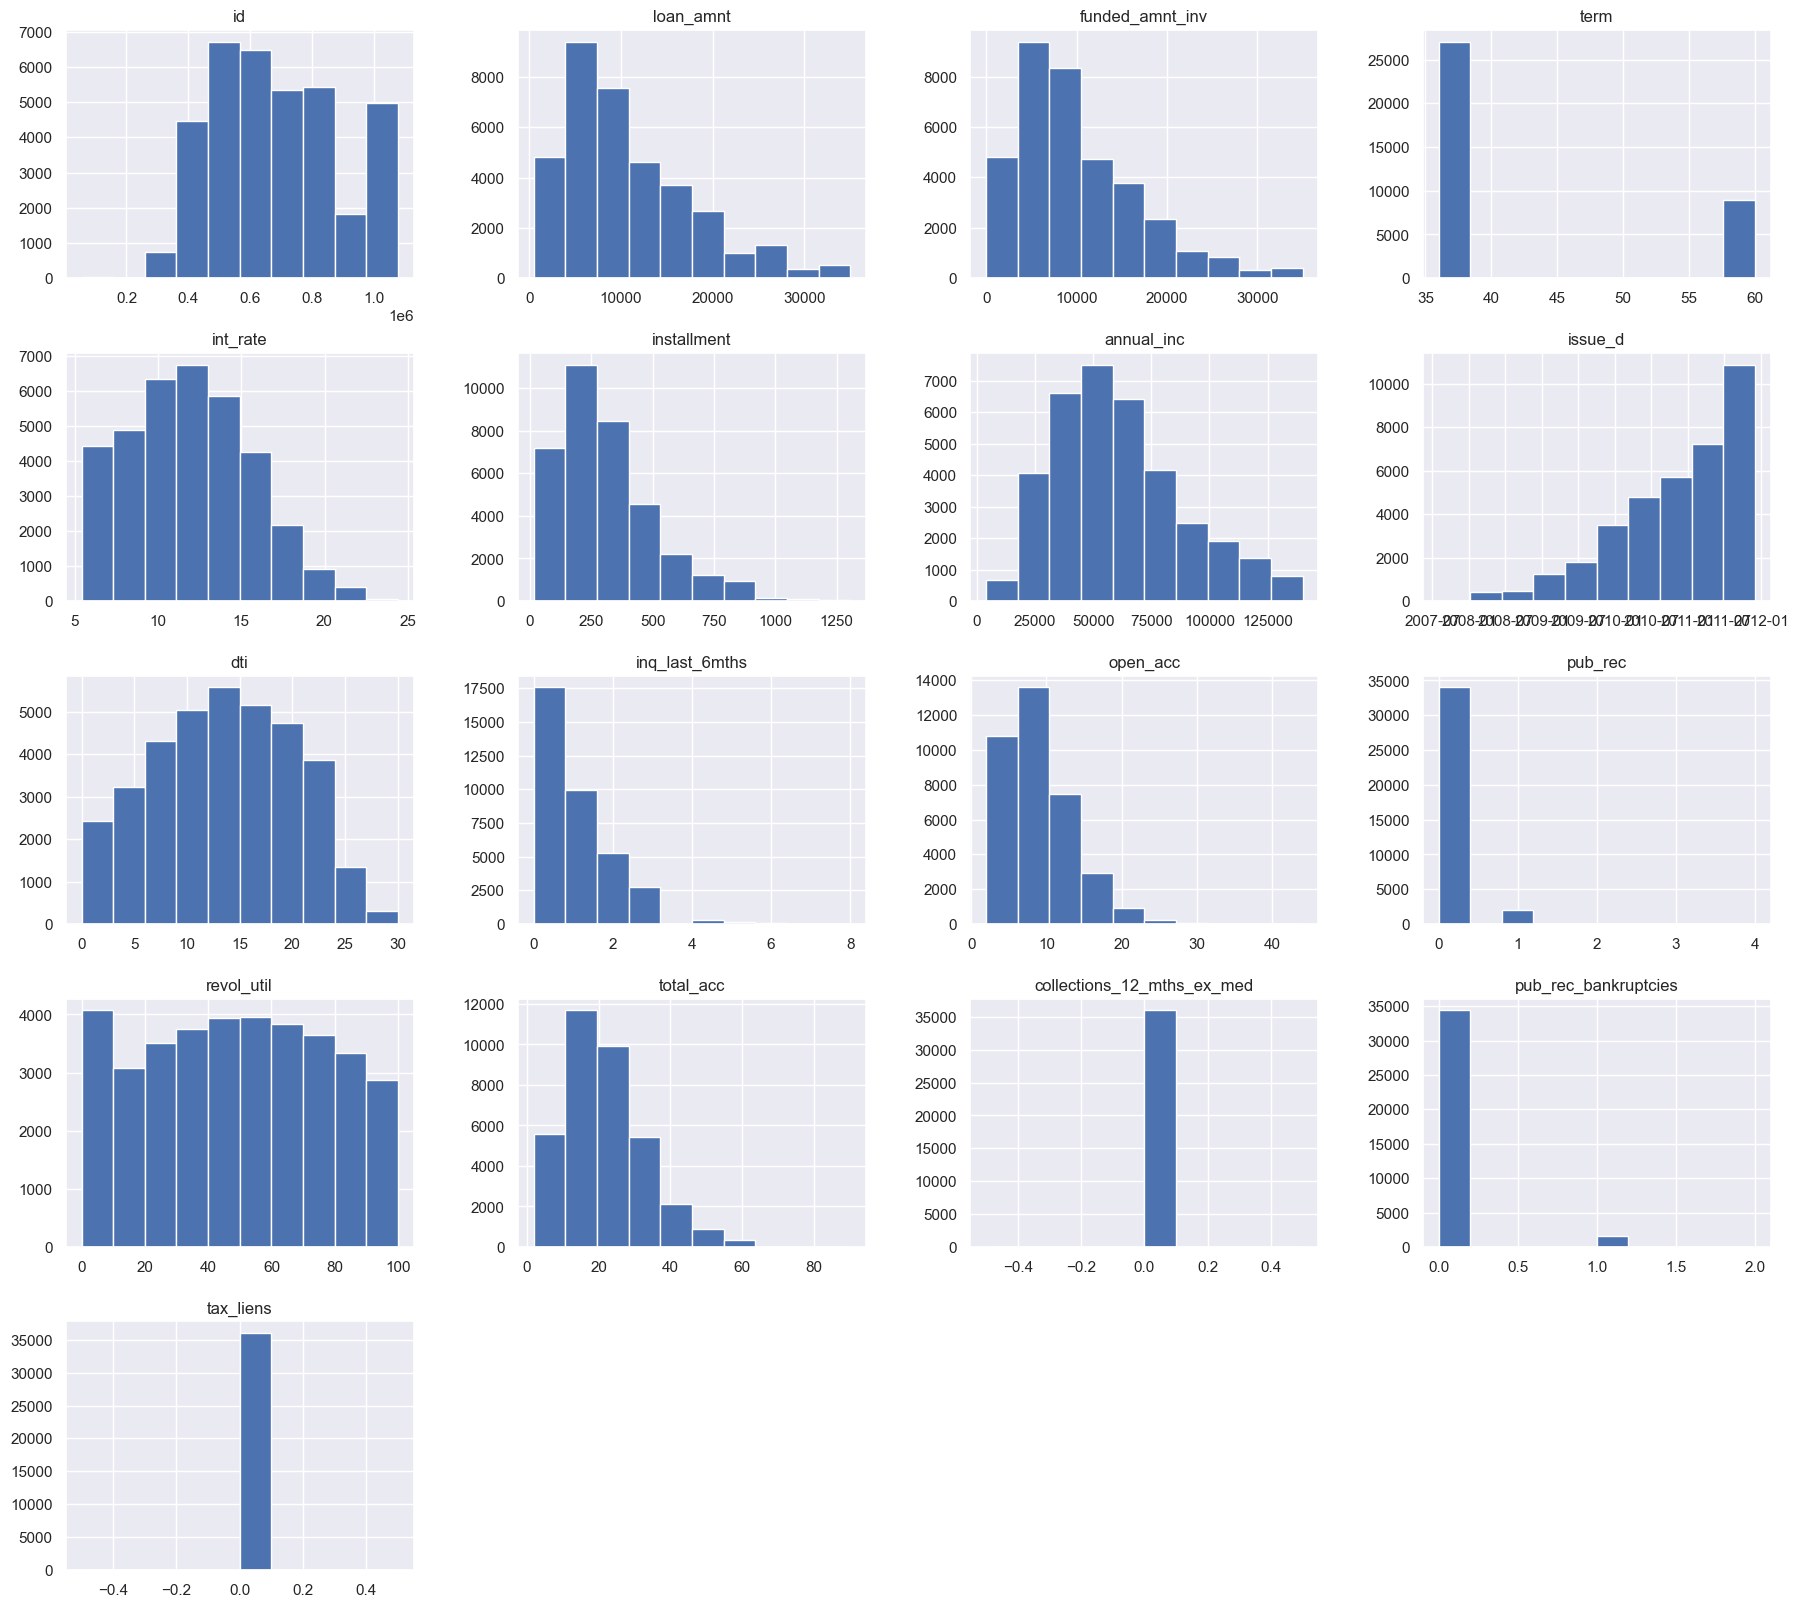

In [77]:
loan_df.hist( figsize = (22, 20) )
plt.show()

### 1.4.3 Derived metrics for Month (issue_m), Year (issue_y) from column "issue_d"

In [78]:
# Extracting Month and Year for analysis from issue_d
loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df[['issue_m', 'issue_y', 'issue_d']]

,issue_m,issue_y,issue_d
0,12,2011,2011-12-01
1,12,2011,2011-12-01
2,12,2011,2011-12-01
3,12,2011,2011-12-01
5,12,2011,2011-12-01
...,...,...,...
39562,11,2007,2007-11-01
39573,11,2007,2007-11-01
39623,10,2007,2007-10-01
39666,8,2007,2007-08-01


#### 1.4.4.1 Bivariate analysis of categorical data with loan_status="charged off"
  **Home Ownership Vs. Loan Status**

<Axes: xlabel='home_ownership', ylabel='count'>

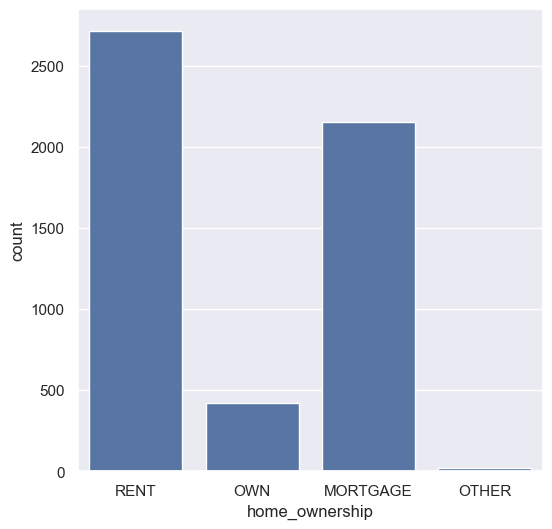

In [79]:
fig, ax = plt.subplots(figsize = (6, 6))

sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

- more than 2500 applicants who defaulted have **Rented house**

#### Comparing Grade with charged_off

<Axes: xlabel='grade', ylabel='count'>

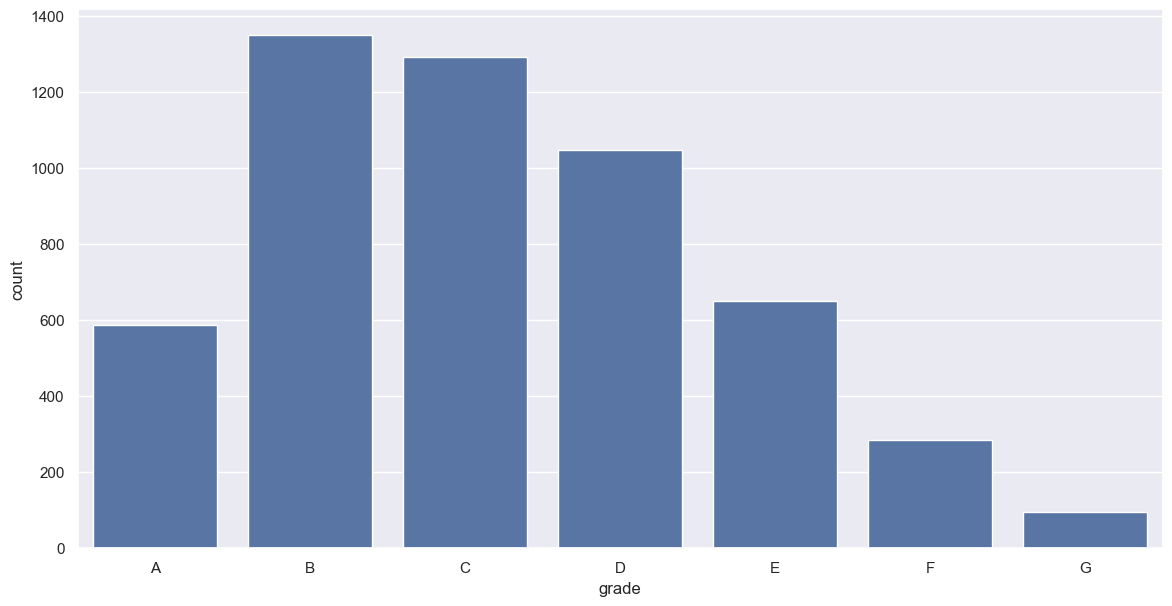

In [80]:
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

- Around **1300** applicants with **Grade B** have defaulted

<Axes: xlabel='sub_grade', ylabel='count'>

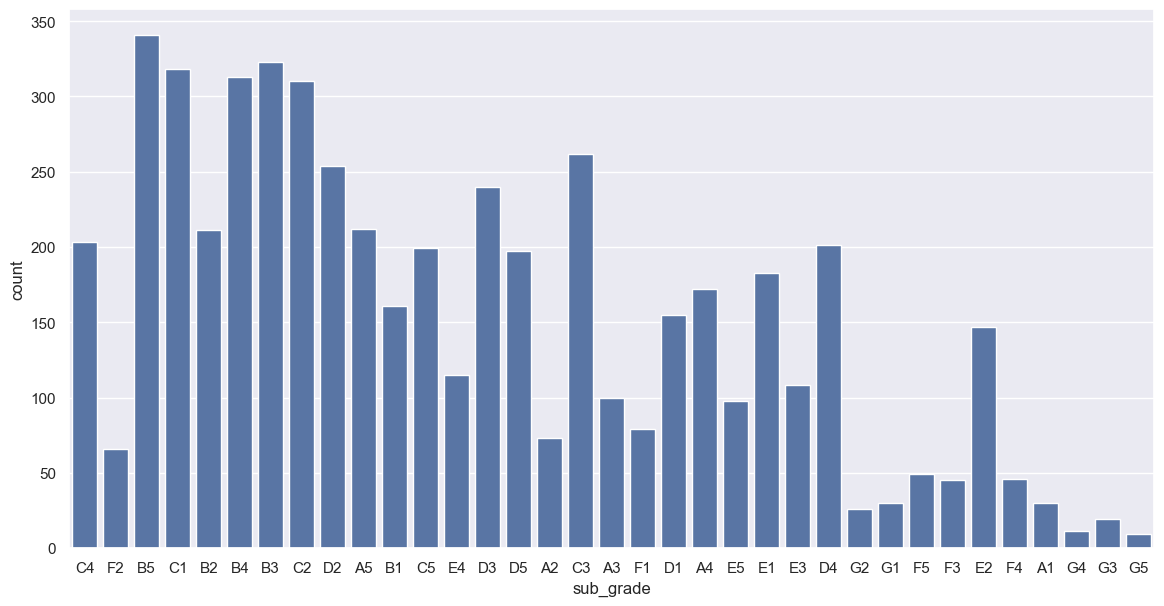

In [81]:
sns.countplot(x = 'sub_grade', data = loan_df[loan_df.loan_status == 'Charged Off'])

##### close to 350 applicants are of subgrade B5

#### Purpose vs charged off

<Axes: xlabel='count', ylabel='purpose'>

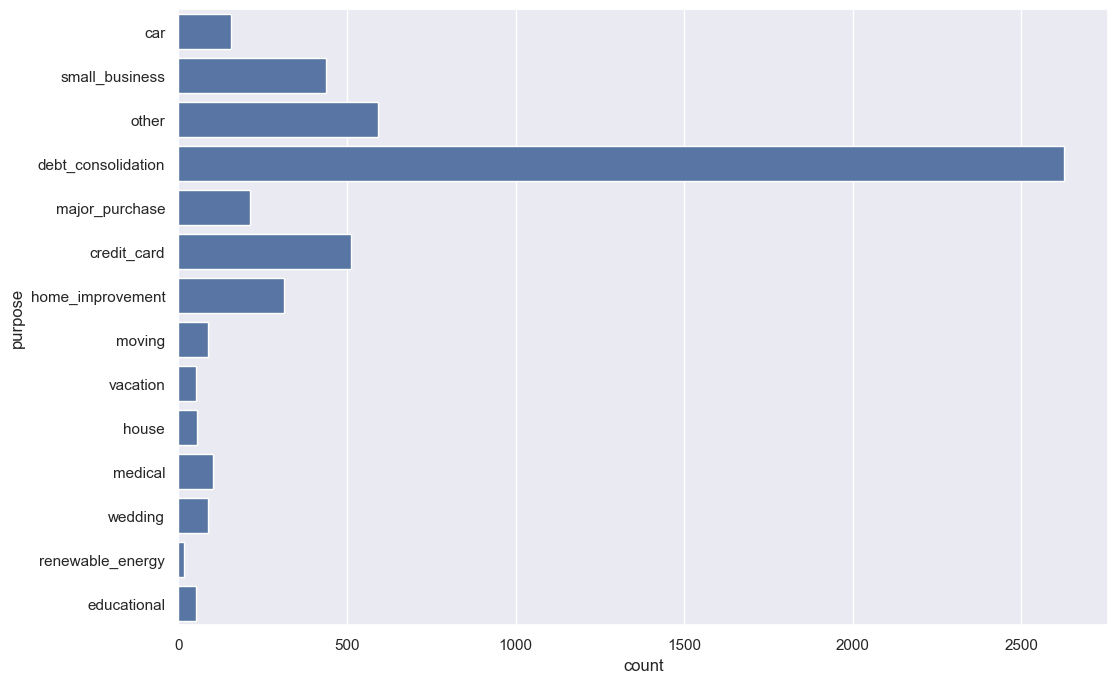

In [82]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])

- More than **2500** applicants who took loan for **debt_consolidation** defaulted

#### Analysing wrt to month and year

<Axes: xlabel='issue_y', ylabel='count'>

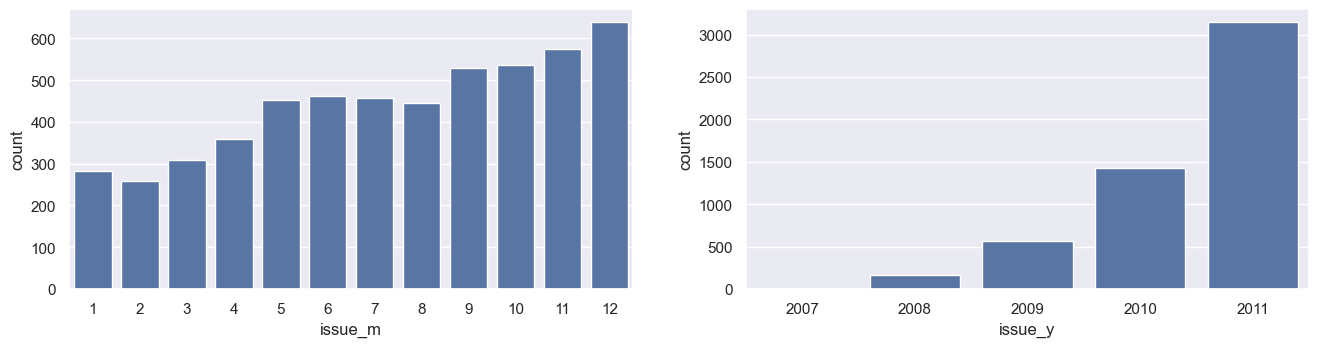

In [83]:
#plt.figure(figsize=(10,10))
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

plt.subplot(221)
sns.countplot(x='issue_m', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_y', data=loan_df[loan_df['loan_status']=='Charged Off'])




- More than **3000** applicants defaulted in **2011* and more than **600** of them have defaulted in the month of **December**

### 1.4.4.2 Bivariate analysis on Quantitative Variables

In [84]:
##### **Quantitative variables**=[ 'loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']

In [85]:
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['funded_amnt_inv_bin'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], bins=6,precision =0,labels=['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])
loan_df['installment_bin'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], bins=6,precision =0,labels=['0-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k+']) 
loan_df['dti_bin'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='loan_amnt_bin', ylabel='count'>

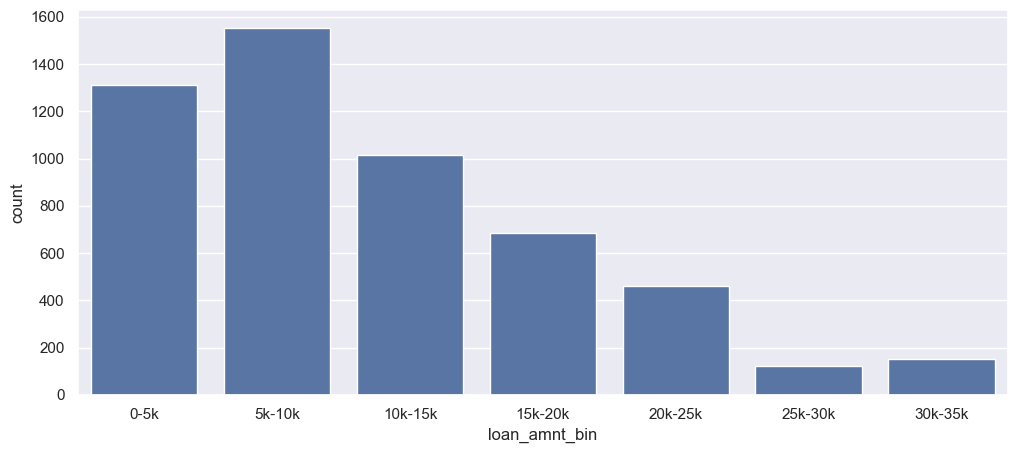

In [86]:
fig,ax = plt.subplots(figsize = (12,5))
#ax.set_yscale('log')
sns.countplot(x='loan_amnt_bin', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [87]:
#### funded_amnt_inv_bin

<Axes: xlabel='funded_amnt_inv_bin', ylabel='count'>

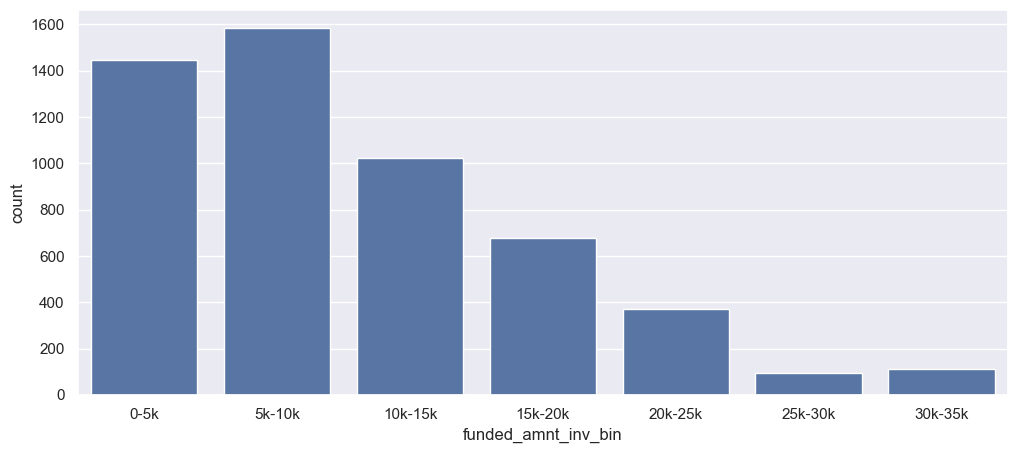

In [88]:
fig,ax = plt.subplots(figsize = (12,5))
#ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_bin', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [89]:
#### int_rate_bin

<Axes: xlabel='int_rate_bin', ylabel='count'>

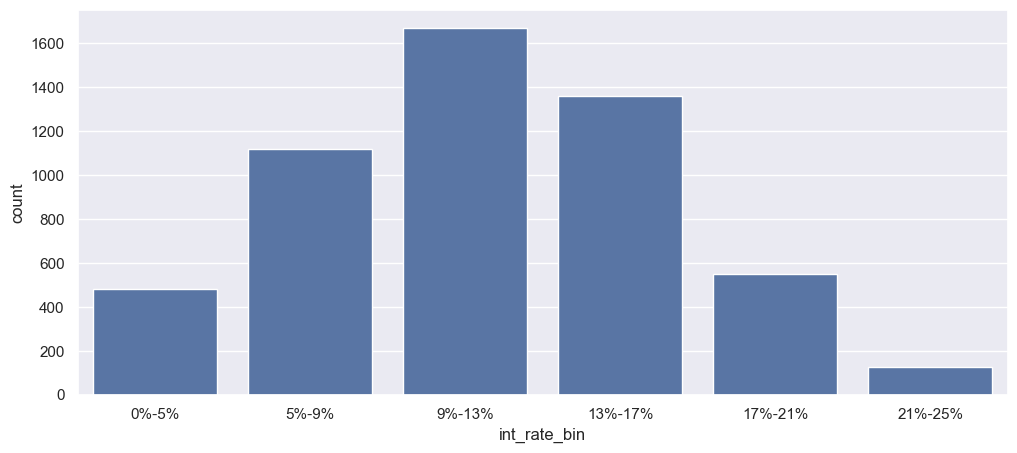

In [90]:
fig,ax = plt.subplots(figsize = (12,5))
#ax.set_yscale('log')
sns.countplot(x='int_rate_bin', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [91]:
#### installment_bin

<Axes: xlabel='installment_bin', ylabel='count'>

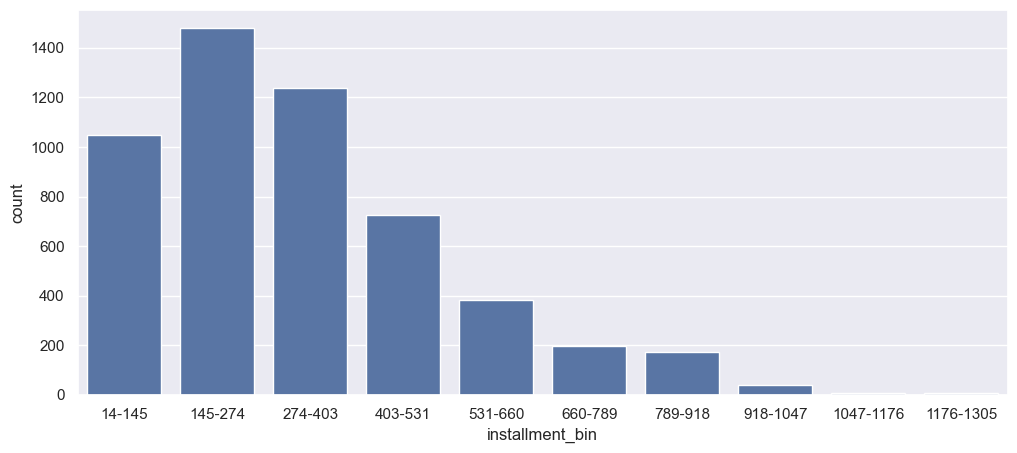

In [92]:
fig,ax = plt.subplots(figsize = (12,5))
#ax.set_yscale('log')
sns.countplot(x='installment_bin', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [93]:
#### annual_inc_bin

<Axes: xlabel='annual_inc_bin', ylabel='count'>

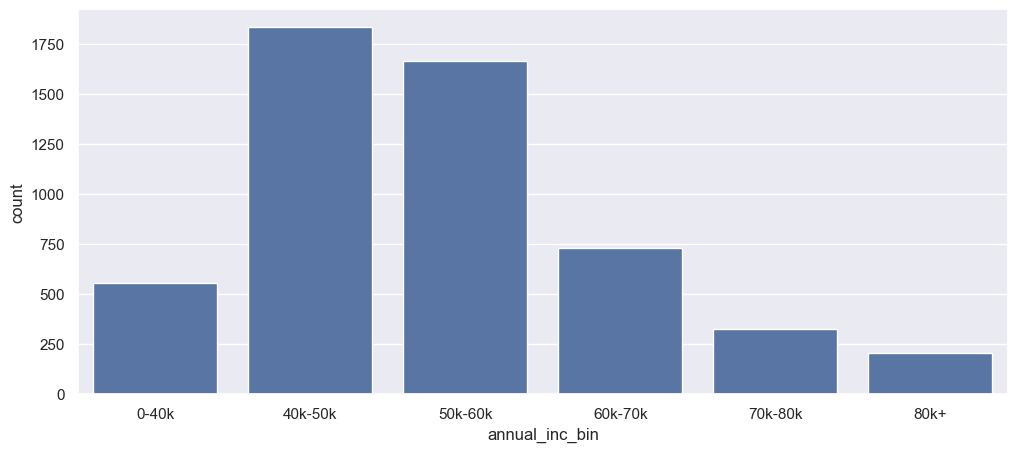

In [94]:
fig,ax = plt.subplots(figsize = (12,5))
#ax.set_yscale('log')
sns.countplot(x='annual_inc_bin', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [95]:
#### dti_bin

<Axes: xlabel='dti_bin', ylabel='count'>

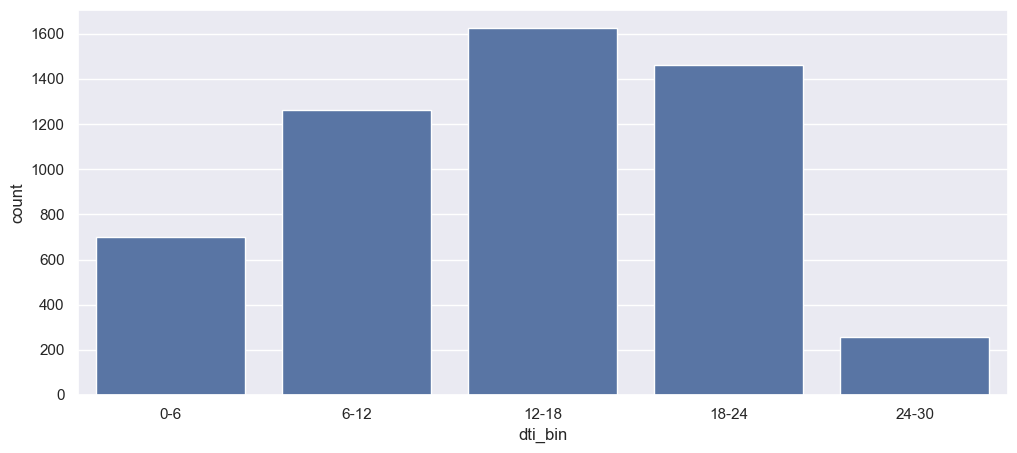

In [96]:
fig,ax = plt.subplots(figsize = (12,5))
#ax.set_yscale('log')
sns.countplot(x='dti_bin', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [97]:
#### Address State vs. Loan Status

### 1.4.5 Multivariate Anlysis

#### 1.4.5.1 Loan amount vs interest rate**

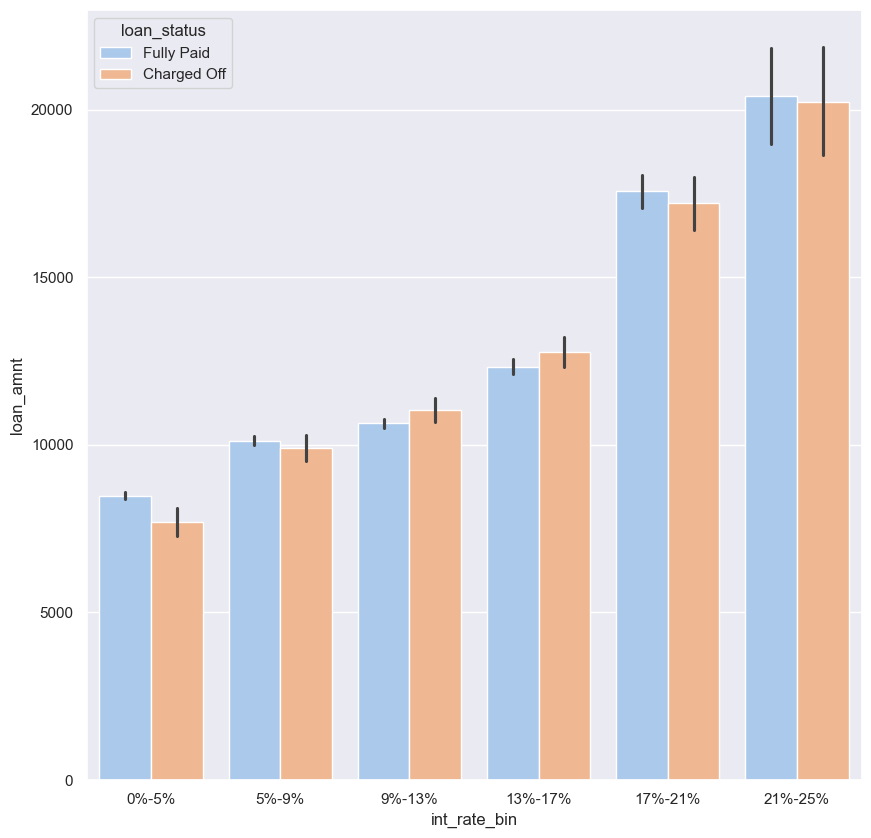

In [98]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df, x='int_rate_bin', y='loan_amnt', hue ='loan_status',palette="pastel")

plt.show()

##### the interest rate is more (21-25%) when the loan amount is more(15-20k)

In [99]:
#### 1.4.5.2 Loan amount vs annual income

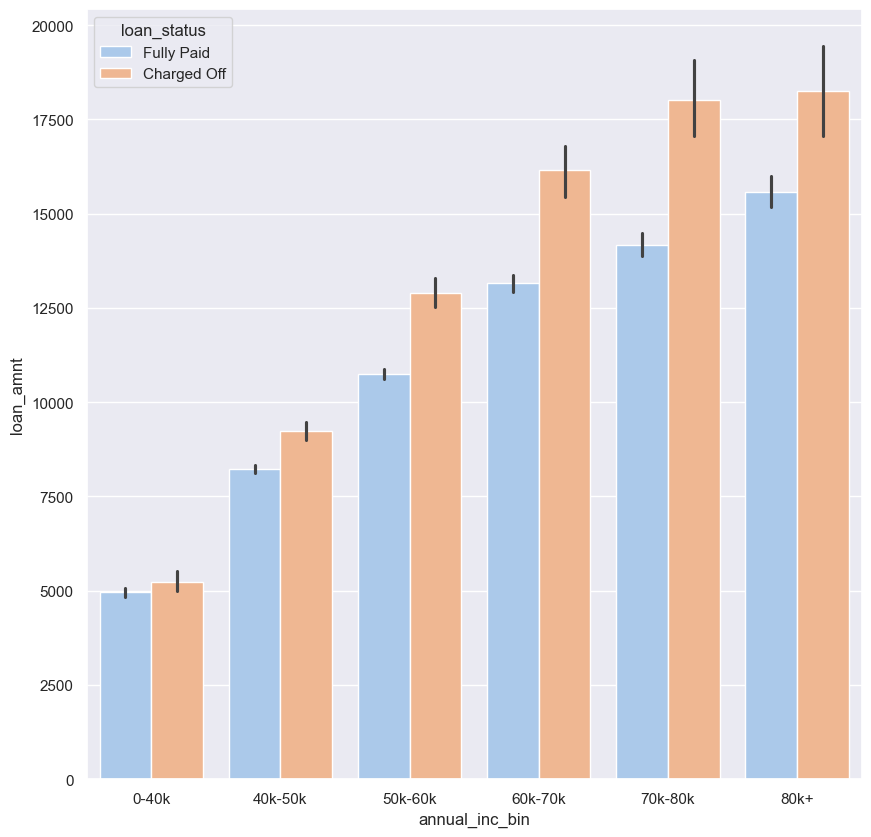

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df, x='annual_inc_bin', y='loan_amnt', hue ='loan_status',palette="pastel")

plt.show()

##### when the loan amount is 5k and above more applicants default than the ones who repay fully. The defaults and paidoff applicants gap increases when the loan amount is more than 12500. as the loan amount is more defauters are more. that is because the rate of interest is more for highe loan amount.so the people in the salary range o 60 to 80k and above go for higher loans and default.

In [101]:
#### 1.4.5.3 interest rate vs 

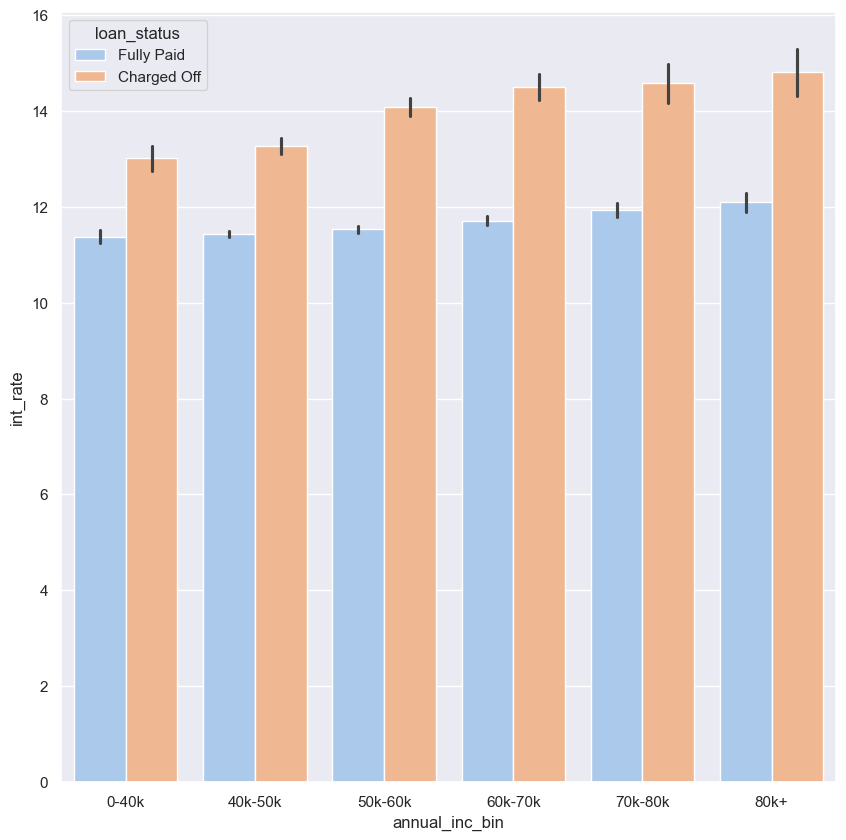

In [102]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df, x='annual_inc_bin', y='int_rate', hue ='loan_status',palette="pastel")

plt.show()

#### people with all ranges of annual income have defaulted more when the inteest rate is high. that is more than 13%. people with annual income range 60 to 80+ have deaulted when the interest rate is above 14%

#### 1.4.5.4 pub_rec_bankruptcies vs annual_inc

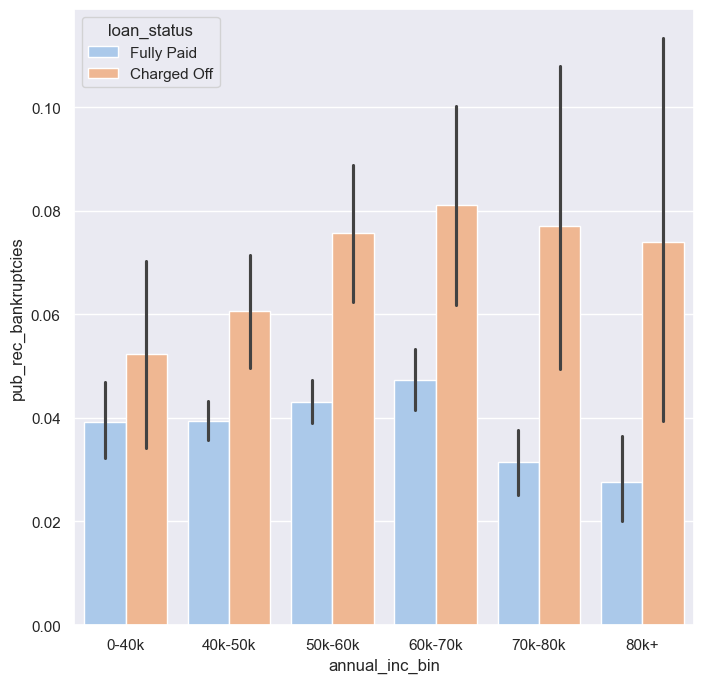

In [103]:
plt.figure(figsize=(8,8))
sns.barplot(data =loan_df, x='annual_inc_bin', y='pub_rec_bankruptcies', hue ='loan_status',palette="pastel")

plt.show()

##### people with more bankruptcy records have defaulted more and they are in the income range of 60 to 70k

#### Analysing annual income with other columns for more insights 

#### 1.4.5.5 Annual income vs Purpose

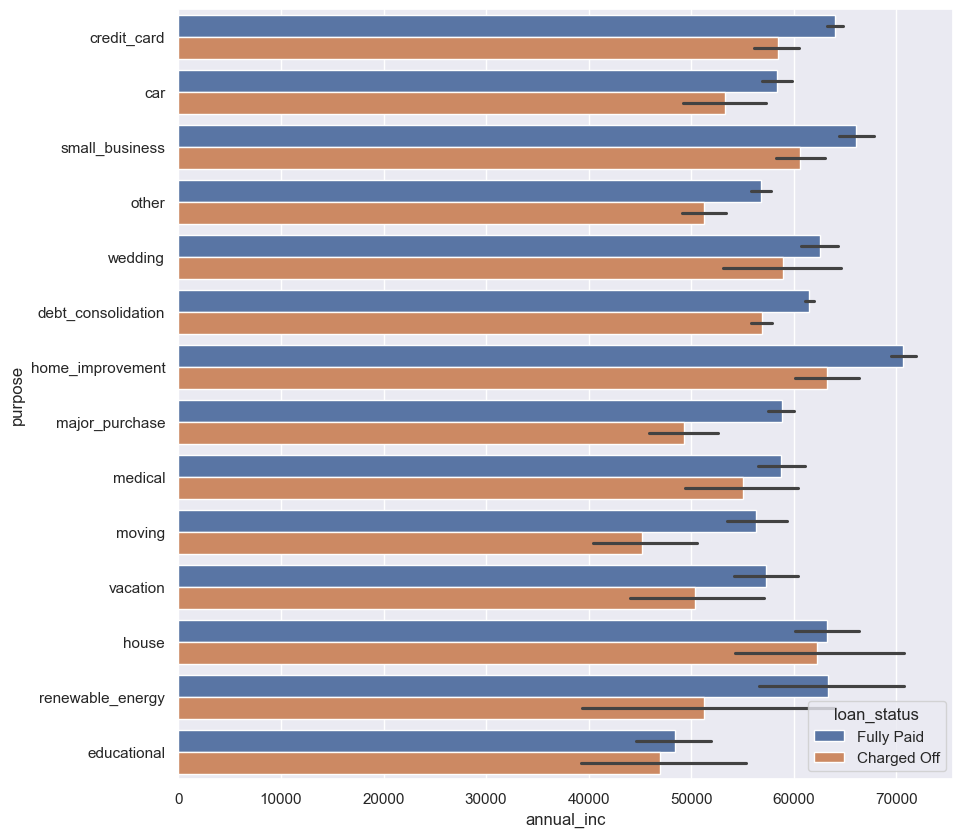

In [104]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### Poeple who are in the salary range of 55k to 65k and who have borrowed money for Home improvement, house construction and small business have defaulted more than any other category of purpose

##### Analysing loan_amount with different variables for more insights 

#### 1.4.5.6 Loan vs Loan purpose

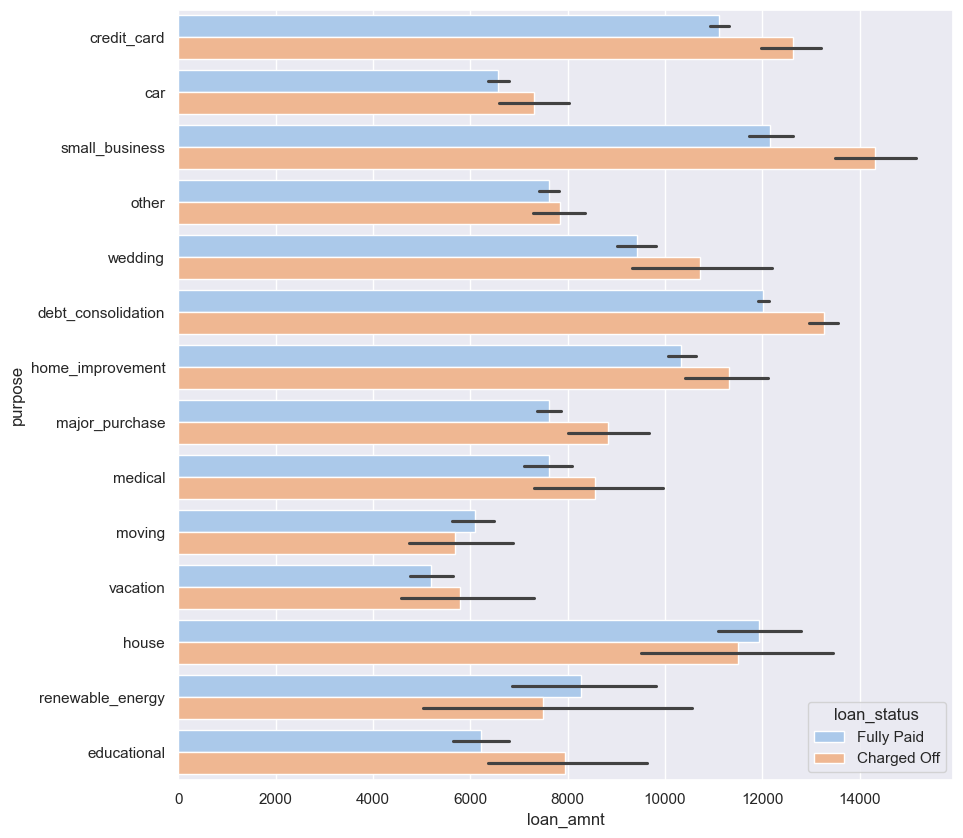

In [105]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### small business, debt consolidation, credit card are the main purposes where people have defaulted when the loan amount is more than 12k

#### 1.4.5.7 Loan vs House Ownership

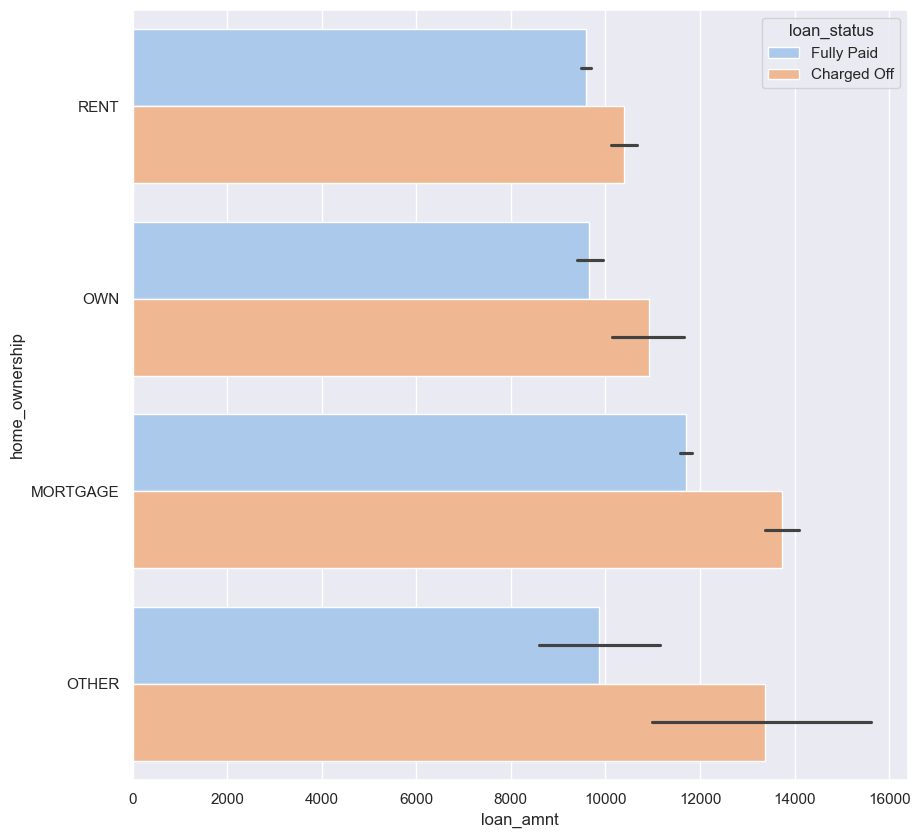

In [106]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### across all types of house ownership people have defaulted when the loan amount is more than 10k. among all, other and mortgae defaulters are more and the amount is more than 12k

#### 1.4.5.8 Loan amount vs Grade

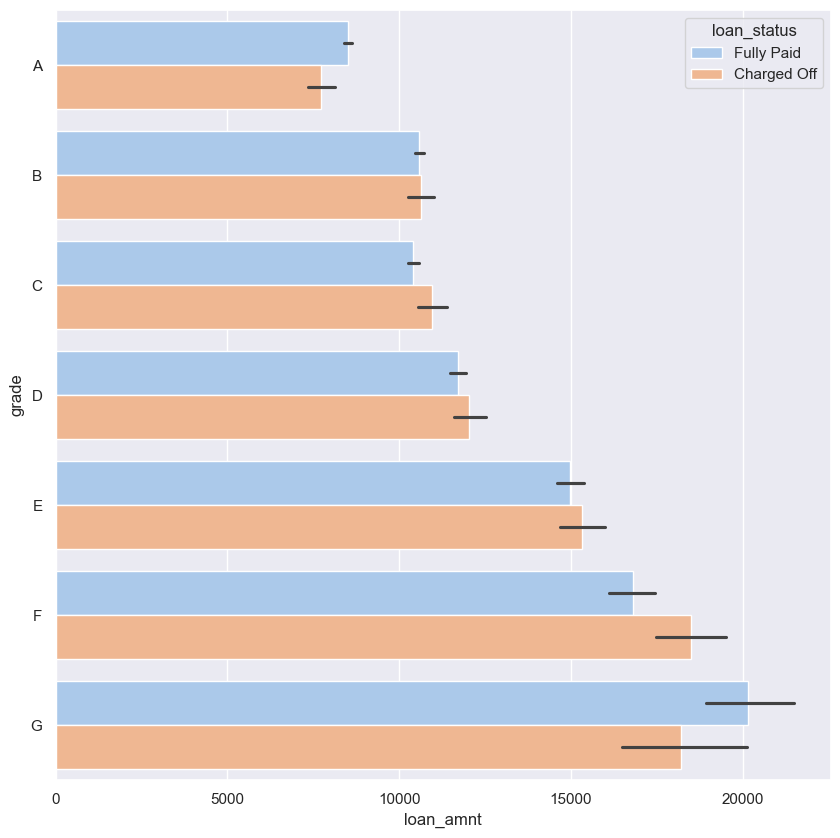

In [107]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

#### The loan amount is more for grades F, G and E respectively which is more than 15k and number of defaulters are also ore in the same category. So every comparison and analysis boils down to the same reason that:
    Number of defaulters ae more when the loan amount is more. Higher the loan amount, higher the interest rate

#### 1.4.5.9 Loan amount vs emp length and verification status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

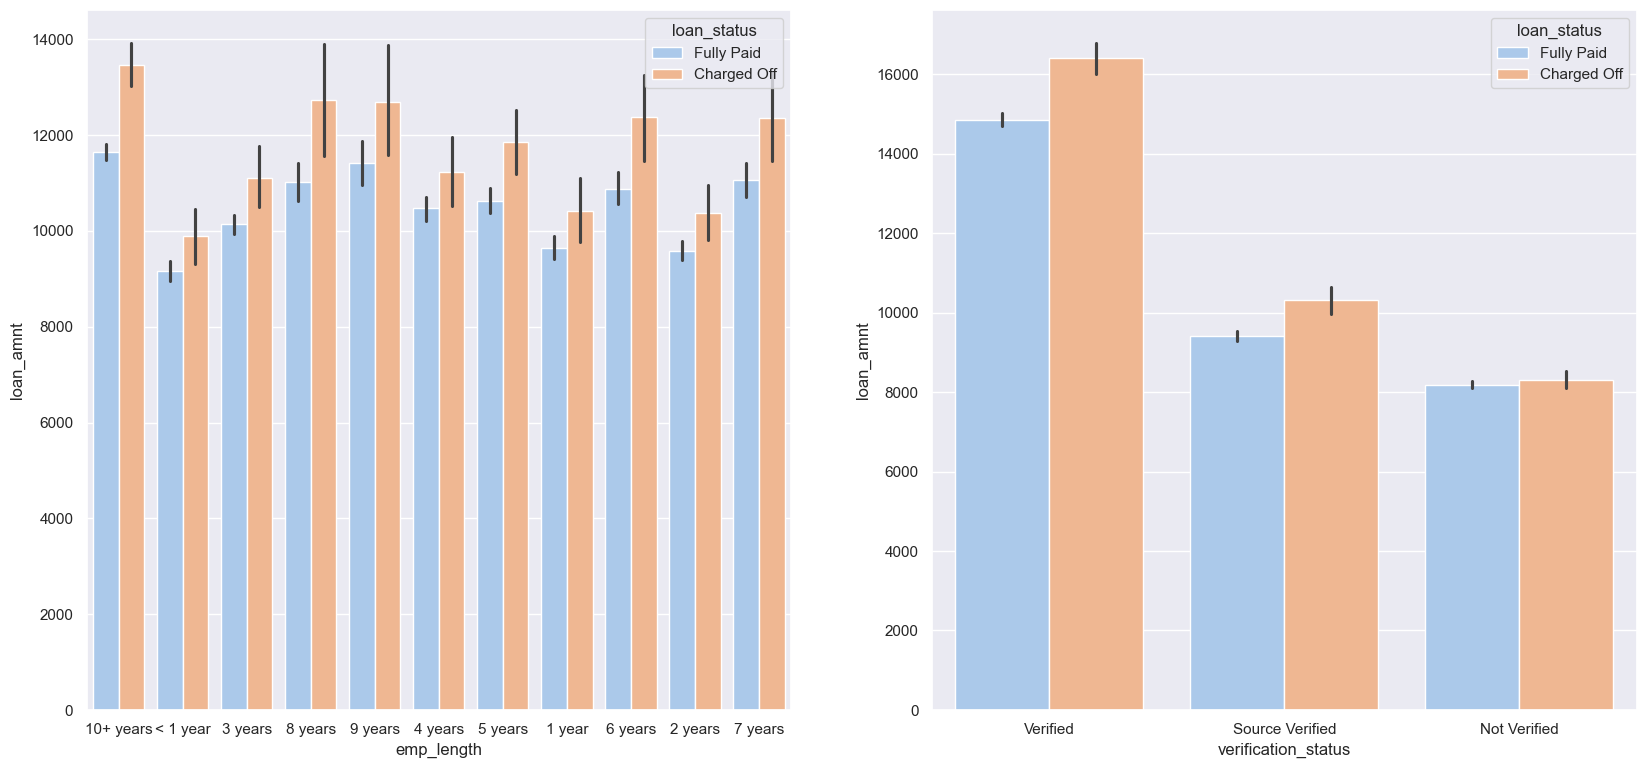

In [108]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

In [109]:
#### As mentioned before whn the loan amount is more than 12k people are likely to default. Interestingly verified applicants who had loan amount more than 12k have deaulted more.

#### 1.4.5.10 Repayment term vs interest rate

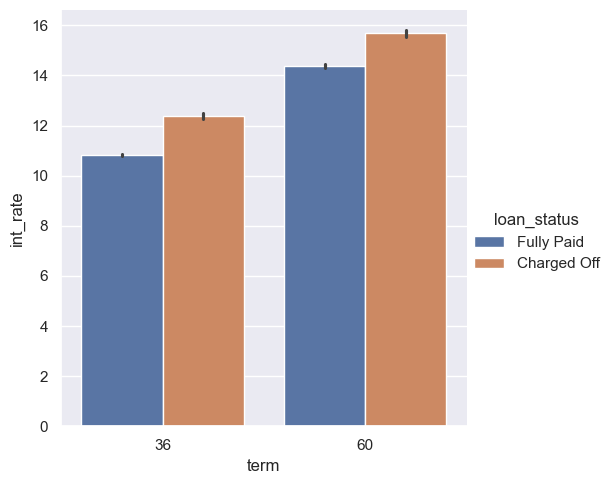

In [110]:
sns.catplot(x = 'term', y = 'int_rate', data = loan_df,hue = 'loan_status', kind = 'bar')

<Axes: xlabel='term', ylabel='emp_length'>

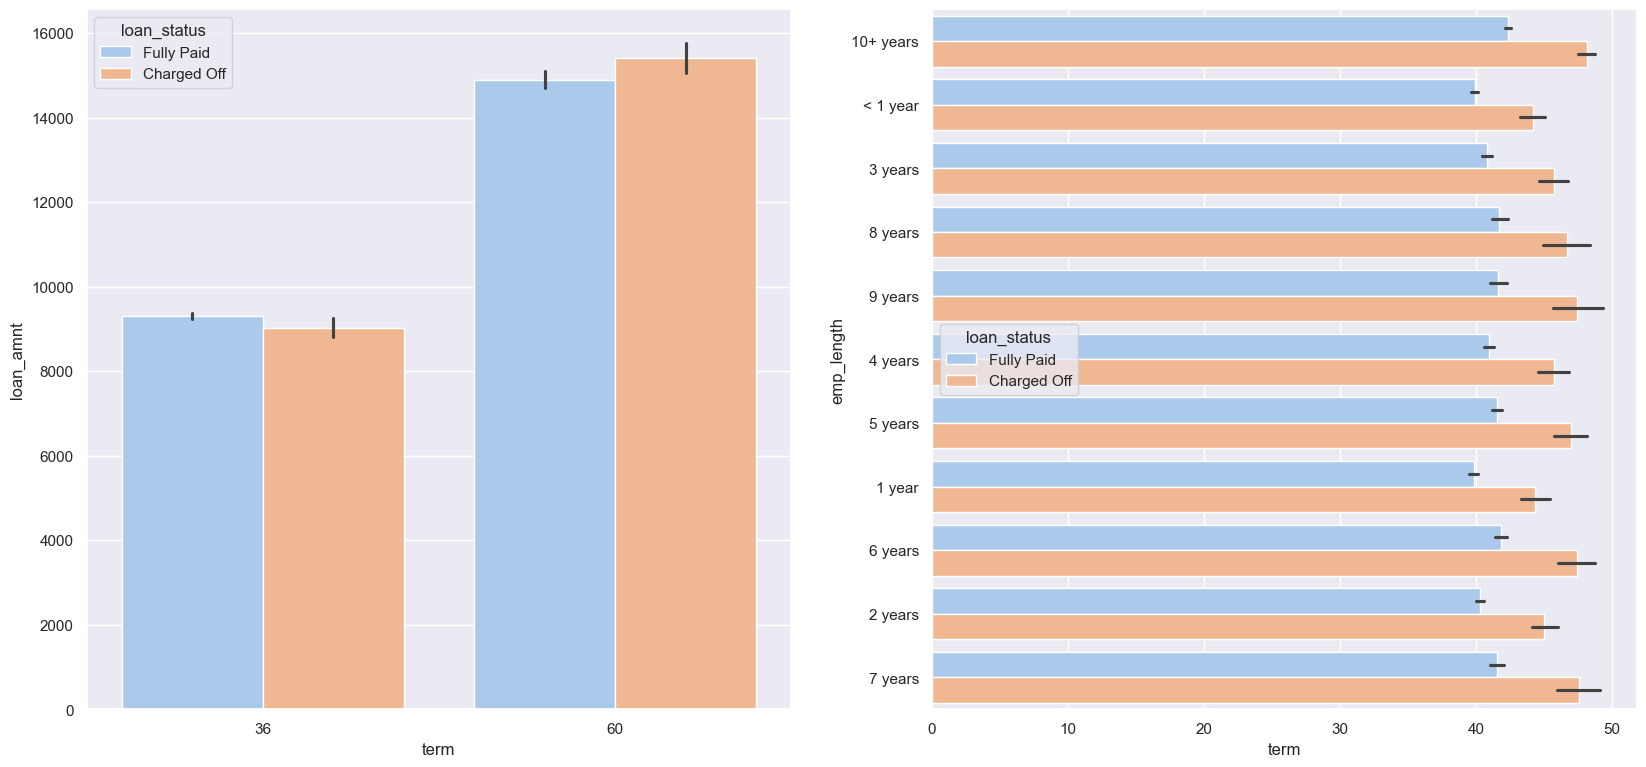

In [111]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_df,y='loan_amnt', x='term', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_df,y='emp_length', x='term', hue ='loan_status',palette="pastel")

#### People with 60 months of repayment term have defaulted more but the defaulting is observed to be the commn trend when the interest rate is above 12%, loan amount is more than 12k-16k, and exp is 8-10years

##### The loan amount decreases with grade, assuming grade A is the highest and grade G the lowest.  along with the grade.so Grade A has the minimum loan_amount=8435 and G has the maximum loan amount=19486

#### now let us plot charged off and laon_amnt

#### Conclusion from the above bar plot is that the majority of the charged _off loan amount is around 11800

#### As per grade Vs laon_amount most of the 11500 to 12000 loan amount is in grade D and E.

In [112]:
grouped = loan_df.groupby('grade')
grouped['loan_status'].value_counts()

grade  loan_status
A      Fully Paid     8927
       Charged Off     587
B      Fully Paid     9554
       Charged Off    1349
C      Fully Paid     6014
       Charged Off    1292
D      Fully Paid     3679
       Charged Off    1047
E      Fully Paid     1764
       Charged Off     651
F      Fully Paid      588
       Charged Off     285
G      Fully Paid      164
       Charged Off      95
Name: count, dtype: int64

##### the maximum number of charged_off cases is 1376 corresponding to B grade.

In [115]:
grouped = loan_df.groupby('emp_length')
grouped['loan_status'].value_counts()

emp_length  int_rate
1 year      10.99       65
            11.49       55
            7.49        54
            13.49       51
            12.53       47
                        ..
< 1 year    22.11        1
            22.48        1
            22.85        1
            23.13        1
            23.52        1
Name: count, Length: 2685, dtype: int64

##### Majority of the loan applicants are with 10+ years of experience: 8879 applicants
- Out of which around 1331 applicants have defaulted.i.e about 15% of 

In [126]:
new_df=loan_df[loan_df['loan_status']=='Charged Off']
defaulters=len(new_df)
rented_app=len(new_df[new_df["home_ownership"]=='RENT'])
exp_10plus=len(new_df[new_df['emp_length']=="10+ years"])
print("total defaulters :", defaulters)
print("Defaulters who have rented house: ", rented_app)
rent_per=rented_app*100/defaulters
exp_10plus_per=exp_10plus*100/defaulters
print("Defaulters who have employment length 10 and more: ", exp_10plus, exp_10plus_per)
print("rented house percentage: ", rent_per)

total defaulters : 5306
Defaulters who have rented house:  2714
Defaulters who have employment length 10 and more:  1468 27.666792310591784
rented house percentage:  51.14964191481342


In [128]:
term_60=len(new_df[(new_df["term"]==60)])
term_60_per=term_60*100/5306
print("defaulters with 60 months term: ", term_60, term_60_per)

defaulters with 60 months term:  2304 43.42254052016585


In [118]:
grade_b=len(new_df[(new_df["grade"]=='B')])
grade_b_per=grade_b*100/5306
print("defaulters with grade B: ", grade_b, grade_b_per)

defaulters with grade B:  1349 25.424048247267244


In [129]:
purpose=len(new_df[(new_df["purpose"]=='debt_consolidation')])
purpose_per=purpose*100/5306
print("defaulters with debt consolidation purpose: ", purpose, purpose_per)

defaulters with debt consolidation purpose:  2627 49.50998869204674


In [130]:
loan_amount=len(new_df[(new_df["loan_amnt"]==5000) | (new_df["loan_amnt"]==10000) | (new_df["loan_amnt"]==12000) | (new_df["loan_amnt"]==15000)])
loan_amount_per=loan_amount*100/5306
print("number of the defaulters have the loan amount from 5k to 15k : ", loan_amount, loan_amount_per)

number of the defaulters have the loan amount from 5k to 15k :  1149 21.654730493780626


In [135]:
verified_count

NameError: name 'verified_count' is not defined